In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
receiving_summary = pd.read_csv('receiving_summary.csv')
receiving_depth = pd.read_csv('receiving_depth.csv')
receiving_concept = pd.read_csv('receiving_concept.csv')
receiving_scheme = pd.read_csv('receiving_scheme.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
receiving_summary.head()

,player,player_id,position,team_name,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,declined_penalties,drop_rate,drops,first_downs,franchise_id,fumbles,grades_hands_drop,grades_hands_fumble,grades_offense,grades_pass_block,grades_pass_route,inline_rate,inline_snaps,interceptions,longest,pass_block_rate,pass_blocks,pass_plays,penalties,receptions,route_rate,routes,slot_rate,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
0,Justin Jefferson,61398,WR,MIN,18,10.7,11,73.0,55.0,22,40,1,4.9,7,83,18,0,83.1,86.0,90.2,NaN,90.2,0.0,0,5,64,0.0,0,777,4,135,93.8,729,29.0,225,107.9,185,8,70.0,544,1857,639,4.7,13.8,2.55
1,Travis Kelce,7844,TE,KC,20,7.5,25,75.3,45.5,10,22,0,4.2,6,92,16,2,88.2,51.7,91.3,73.1,91.6,26.0,202,3,52,3.6,28,776,4,137,90.6,703,44.2,343,123.8,182,16,29.1,226,1596,772,5.6,11.6,2.27
2,Tyreek Hill,10799,WR,MIA,18,12.6,12,69.6,50.0,13,26,1,3.8,5,81,17,1,89.7,67.1,92.1,NaN,92.0,1.1,7,7,64,0.0,0,614,5,126,94.3,579,42.3,260,97.8,181,7,54.4,334,1779,524,4.2,14.1,3.07
3,Davante Adams,8688,WR,LV,17,12.8,16,59.5,44.1,15,34,0,5.7,6,66,23,1,76.9,59.2,90.1,66.1,90.5,0.0,0,6,60,0.2,1,657,2,100,94.1,618,30.0,197,102.2,168,14,69.6,457,1516,502,5.0,15.2,2.45
4,CeeDee Lamb,61570,WR,DAL,19,10.3,16,72.5,46.7,14,30,1,5.5,7,75,9,0,78.9,86.0,86.2,NaN,87.0,0.3,2,5,46,0.0,0,678,4,121,95.3,646,62.7,425,108.5,167,10,36.1,245,1544,555,4.6,12.8,2.39


In [5]:
receiving_summary.describe()

,player_id,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,declined_penalties,drop_rate,drops,first_downs,franchise_id,fumbles,grades_hands_drop,grades_hands_fumble,grades_offense,grades_pass_block,grades_pass_route,inline_rate,inline_snaps,interceptions,longest,pass_block_rate,pass_blocks,pass_plays,penalties,receptions,route_rate,routes,slot_rate,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
count,510.000000,510.000000,510.000000,510.000000,510.000000,361.000000,510.000000,510.000000,510.000000,495.000000,510.000000,510.000000,510.000000,510.000000,492.000000,497.000000,510.000000,329.000000,507.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,491.000000,491.000000,506.000000
mean,42907.268627,11.872549,6.772157,3.092157,70.048431,45.188089,2.501961,5.456863,0.119608,6.784040,1.527451,12.570588,16.339216,0.335294,66.071951,65.223340,64.439804,58.811550,62.668639,14.046471,28.380392,0.854902,28.756863,9.335098,16.511765,232.411765,1.062745,23.919608,84.328235,194.990196,26.373333,67.790196,89.707059,34.201961,1.556863,31.849608,83.654902,261.556863,124.419608,5.551935,10.324236,1.220178
std,28272.010269,5.462268,6.765326,4.615398,21.640026,31.257474,3.984621,7.990976,0.353773,12.044945,1.896702,16.308239,9.340988,0.756978,14.807412,19.080096,11.200188,17.175532,11.815648,25.244791,63.741192,1.410919,19.122182,13.037850,39.099526,209.575057,1.527735,27.168387,16.726584,187.342741,22.820046,94.513027,27.164481,38.681974,2.356219,30.404393,131.860476,332.406448,146.695321,3.783187,5.388389,1.182216
min,698.000000,1.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.500000,13.300000,26.700000,11.200000,28.100000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-10.000000,-6.000000,-6.000000,-6.000000,-10.000000
25%,11905.750000,7.250000,1.225000,0.000000,61.600000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,59.200000,61.200000,56.400000,47.800000,54.400000,0.000000,0.000000,0.000000,14.250000,0.000000,0.000000,54.250000,0.000000,3.250000,78.825000,40.000000,7.800000,6.000000,76.725000,6.000000,0.000000,6.525000,6.000000,30.000000,15.000000,3.400000,7.000000,0.700000
50%,45740.500000,13.000000,6.500000,1.000000,71.400000,44.400000,1.000000,2.000000,0.000000,4.200000,1.000000,6.000000,16.000000,0.000000,68.300000,71.100000,63.850000,64.400000,61.800000,0.050000,0.500000,0.000000,26.000000,2.600000,3.000000,167.500000,1.000000,13.000000,90.000000,129.500000,20.750000,26.000000,91.700000,19.000000,1.000000,16.650000,25.500000,130.000000,68.000000,5.000000,9.900000,1.080000
75%,60891.500000,17.000000,11.175000,4.000000,83.225000,61.500000,3.000000,7.000000,0.000000,8.600000,2.000000,18.000000,25.000000,0.000000,76.275000,78.100000,71.750000,72.100000,69.600000,16.900000,13.000000,1.000000,41.000000,15.875000,22.000000,352.000000,1.000000,34.000000,94.500000,312.000000,39.425000,89.750000,107.300000,50.750000,2.000000,62.575000,84.500000,376.750000,171.500000,7.000000,12.700000,1.550000
max,143786.000000,20.000000,49.000000,36.000000,100.000000,100.000000,24.000000,47.000000,2.000000,100.000000,9.000000,92.000000,32.000000,6.000000,91.000000,91.300000,92.100000,89.600000,92.400000,100.000000,358.000000,7.000000,98.000000,99.700000,663.000000,885.000000,10.000000,137.000000,100.000000,729.000000,100.000000,586.000000,158.300000,185.000000,16.000000,100.000000,630.000000,1857.000000,871.000000,34.000000,42.000000,12.000000


In [6]:
receiving_summary[receiving_summary['receptions'] == 0]

,player,player_id,position,team_name,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,declined_penalties,drop_rate,drops,first_downs,franchise_id,fumbles,grades_hands_drop,grades_hands_fumble,grades_offense,grades_pass_block,grades_pass_route,inline_rate,inline_snaps,interceptions,longest,pass_block_rate,pass_blocks,pass_plays,penalties,receptions,route_rate,routes,slot_rate,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
402,Lance McCutcheon,61478,WR,LA,8,14.3,0,0.0,0.0,0,2,0,NaN,0,0,26,0,NaN,NaN,47.8,NaN,47.4,0.0,0,0,0,0.0,0,31,0,0,93.5,29,19.4,6,39.6,4,0,80.6,25,0,0,NaN,NaN,0.0
447,Charlie Woerner,42257,TE,SF,13,21.5,0,0.0,NaN,0,0,0,100.0,1,0,28,0,27.9,NaN,44.1,68.6,37.2,67.9,38,0,0,30.4,17,56,1,0,64.3,36,21.4,12,39.6,2,0,10.7,6,0,0,NaN,NaN,0.0
450,Feleipe Franks,40217,QB,ATL,8,27.0,0,0.0,0.0,0,1,0,NaN,0,0,2,0,NaN,61.9,47.5,74.3,46.0,15.4,4,0,0,11.5,3,26,1,0,88.5,23,46.2,12,39.6,2,0,30.8,8,0,0,NaN,NaN,0.0
453,Tanner Conner,22777,TE,MIA,6,6.5,0,0.0,NaN,0,0,0,100.0,2,0,17,0,25.5,NaN,30.9,NaN,29.3,50.0,7,0,0,0.0,0,14,0,0,78.6,11,7.1,1,39.6,2,0,42.9,6,0,0,NaN,NaN,0.0
462,Tyrion Davis-Price,99169,HB,SF,4,0.0,0,0.0,NaN,0,0,0,NaN,0,0,28,0,NaN,80.4,53.6,NaN,49.3,3.4,1,0,0,0.0,0,29,0,0,96.6,28,10.3,3,39.6,2,0,13.8,4,0,0,NaN,NaN,0.0
472,Jaret Patterson,77745,HB,WAS,1,4.0,0,0.0,NaN,0,0,0,NaN,0,0,32,0,64.7,78.1,60.9,NaN,56.5,0.0,0,0,0,0.0,0,12,0,0,83.3,10,0.0,0,39.6,1,0,8.3,1,0,0,NaN,NaN,0.0
477,Kirk Merritt,35096,WR,NO,3,22.0,0,0.0,NaN,0,0,0,NaN,0,0,20,0,NaN,NaN,55.0,NaN,55.3,0.0,0,0,0,0.0,0,8,0,0,87.5,7,37.5,3,39.6,1,0,62.5,5,0,0,NaN,NaN,0.0
480,DJ Turner,47663,WR,LV,6,-3.0,0,0.0,NaN,0,0,0,100.0,1,0,23,0,27.9,75.0,41.8,NaN,42.0,0.0,0,0,0,0.0,0,8,0,0,100.0,8,50.0,4,39.6,1,0,50.0,4,0,0,NaN,NaN,0.0
485,Josh Ali,61359,WR,ATL,2,49.0,0,0.0,NaN,0,0,0,NaN,0,0,2,0,NaN,NaN,55.6,NaN,56.2,0.0,0,0,0,0.0,0,5,0,0,100.0,5,80.0,4,39.6,1,0,20.0,1,0,0,NaN,NaN,0.0
488,Khari Blasingame,44889,FB,CHI,16,-3.0,0,0.0,NaN,0,0,0,NaN,0,0,6,0,NaN,NaN,59.6,79.4,43.6,30.4,17,0,0,37.5,21,56,0,0,57.1,32,12.5,7,39.6,1,0,7.1,4,0,0,NaN,NaN,0.0


In [7]:
receiving_summary = receiving_summary[receiving_summary['receptions'] != 0]
receiving_summary.describe()

,player_id,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,declined_penalties,drop_rate,drops,first_downs,franchise_id,fumbles,grades_hands_drop,grades_hands_fumble,grades_offense,grades_pass_block,grades_pass_route,inline_rate,inline_snaps,interceptions,longest,pass_block_rate,pass_blocks,pass_plays,penalties,receptions,route_rate,routes,slot_rate,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
count,491.000000,491.000000,491.000000,491.000000,491.000000,358.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,486.000000,491.000000,491.000000,322.000000,488.000000,491.000000,491.000000,491.000000,491.000000,491.00000,491.000000,491.000000,491.000000,491.000000,491.000000,491.00000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,487.000000
mean,42885.484725,12.077393,6.622200,3.211813,72.759063,45.566760,2.598778,5.659878,0.120163,6.024644,1.576375,13.057026,16.311609,0.340122,66.396708,65.141141,64.892057,58.695342,63.192418,13.802648,29.262729,0.883910,29.869654,9.11833,16.327902,238.224033,1.079430,24.845214,84.717719,202.00611,26.551935,70.272912,91.807332,35.472505,1.617108,31.700815,86.674134,271.678208,129.234216,5.551935,10.324236,1.267782
std,28405.565781,5.376642,6.403658,4.662917,16.994805,31.111683,4.029979,8.075435,0.355454,8.646086,1.913372,16.428845,9.296184,0.750781,14.472441,19.163582,10.882819,17.069088,11.593357,25.006180,64.768396,1.428845,18.615314,12.19095,36.982737,207.705430,1.534569,27.270835,15.859586,187.42935,22.868845,95.460938,25.340655,38.869966,2.381055,30.379005,133.472751,334.698595,147.412569,3.783187,5.388389,1.179745
min,2973.000000,1.000000,-8.000000,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.500000,13.300000,32.200000,11.200000,30.000000,0.000000,0.000000,0.000000,-6.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,5.100000,1.000000,0.000000,0.000000,0.000000,-10.000000,-6.000000,-6.000000,-6.000000,-10.000000
25%,11893.500000,8.000000,1.200000,0.000000,63.250000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,0.000000,59.475000,61.200000,57.100000,47.575000,54.700000,0.000000,0.000000,0.000000,15.000000,0.00000,0.000000,62.000000,0.000000,4.000000,79.000000,47.50000,7.850000,7.000000,78.250000,6.500000,0.000000,6.500000,7.000000,39.500000,20.000000,3.400000,7.000000,0.730000
50%,45734.000000,13.000000,6.500000,1.000000,72.200000,44.400000,1.000000,2.000000,0.000000,4.200000,1.000000,7.000000,16.000000,0.000000,68.300000,71.100000,64.300000,63.550000,62.200000,0.100000,1.000000,0.000000,27.000000,2.80000,3.000000,175.000000,1.000000,15.000000,90.500000,139.00000,20.800000,29.000000,93.500000,21.000000,1.000000,15.900000,27.000000,139.000000,76.000000,5.000000,9.900000,1.100000
75%,60905.500000,17.000000,11.050000,4.000000,83.300000,62.250000,3.000000,7.000000,0.000000,8.400000,2.000000,18.000000,25.000000,0.000000,76.500000,78.050000,72.050000,72.000000,69.750000,14.150000,14.000000,1.000000,41.500000,15.85000,22.500000,359.500000,1.000000,36.000000,94.500000,318.50000,39.500000,97.000000,108.300000,53.000000,2.000000,63.050000,97.000000,394.500000,183.000000,7.000000,12.700000,1.570000
max,143786.000000,20.000000,44.000000,36.000000,100.000000,100.000000,24.000000,47.000000,2.000000,66.700000,9.000000,92.000000,32.000000,6.000000,91.000000,91.300000,92.100000,89.600000,92.400000,94.900000,358.000000,7.000000,98.000000,99.70000,663.000000,885.000000,10.000000,137.000000,100.000000,729.00000,100.000000,586.000000,158.300000,185.000000,16.000000,100.000000,630.000000,1857.000000,871.000000,34.000000,42.000000,12.000000


In [8]:
receiving_summary['position'].value_counts()

WR    219
HB    132
TE    114
FB     14
QB      8
LB      2
CB      1
T       1
Name: position, dtype: int64

In [9]:
receiving_positions = ['WR', 'HB', 'TE']

<AxesSubplot:xlabel='player_game_count', ylabel='Count'>

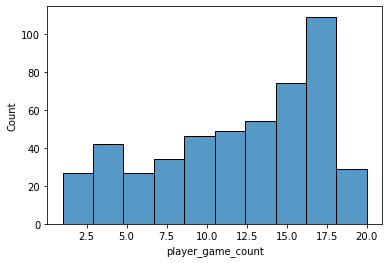

In [10]:
sb.histplot(data=receiving_summary, x='player_game_count') 

In [11]:
receiving_summary = receiving_summary[(receiving_summary['position'].isin(receiving_positions)) &
                                      (receiving_summary['player_game_count'] >= 7)]
receiving_summary.shape

(374, 45)

In [12]:
contested = receiving_summary[['contested_catch_rate', 'contested_receptions', 'contested_targets']]
contested.dropna(inplace=True)
contested

C:\Users\krish\AppData\Local\Temp\ipykernel_25572\434547970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contested.dropna(inplace=True)


,contested_catch_rate,contested_receptions,contested_targets
0,55.0,22,40
1,45.5,10,22
2,50.0,13,26
3,44.1,15,34
4,46.7,14,30
...,...,...,...
415,100.0,2,2
427,100.0,2,2
432,100.0,1,1
433,100.0,1,1


In [13]:
(contested['contested_catch_rate'] ==
 round(contested['contested_receptions'] / contested['contested_targets'] * 100, 1)).mean()

0.9968253968253968

In [14]:
receiving_summary['perc_catches_contested'] = receiving_summary['contested_receptions'] / receiving_summary['receptions'] * 100

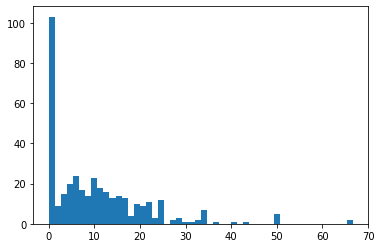

In [15]:
plt.hist(receiving_summary['perc_catches_contested'], bins=50);

<AxesSubplot:xlabel='contested_catch_rate', ylabel='perc_catches_contested'>

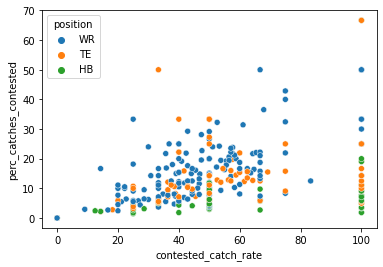

In [16]:
sb.scatterplot(data=receiving_summary, x='contested_catch_rate', y='perc_catches_contested', hue='position')

In [17]:
receiving_summary[['yards_after_catch_per_reception', 'yards_per_reception']]

,yards_after_catch_per_reception,yards_per_reception
0,4.7,13.8
1,5.6,11.6
2,4.2,14.1
3,5.0,15.2
4,4.6,12.8
...,...,...
443,18.0,13.0
446,3.5,5.5
449,7.5,13.0
459,5.5,2.0


In [18]:
receiving_summary['yac_to_total_ratio'] = receiving_summary['yards_after_catch_per_reception'] / receiving_summary['yards_per_reception']
receiving_summary['yac_to_total_ratio']

0      0.340580
1      0.482759
2      0.297872
3      0.328947
4      0.359375
         ...   
443    1.384615
446    0.636364
449    0.576923
459    2.750000
461    0.750000
Name: yac_to_total_ratio, Length: 374, dtype: float64

<AxesSubplot:xlabel='yac_to_total_ratio'>

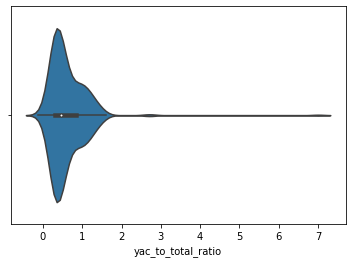

In [19]:
sb.violinplot(data=receiving_summary, x='yac_to_total_ratio')

<AxesSubplot:xlabel='yac_to_total_ratio', ylabel='Count'>

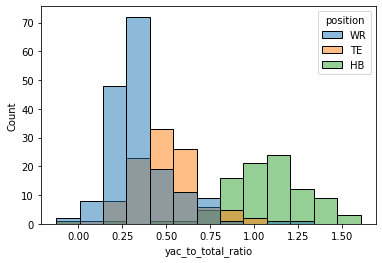

In [20]:
sb.histplot(data=receiving_summary[receiving_summary['yac_to_total_ratio'] <= 2],
            x='yac_to_total_ratio', hue='position')

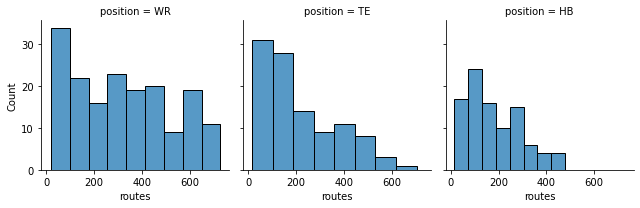

In [21]:
g = sb.FacetGrid(receiving_summary, col='position')
g.map(sb.histplot, 'routes')

In [22]:
receiving_concept.head()

,player,player_id,position,team_name,player_game_count,base_targets,declined_penalties,franchise_id,penalties,screen_avg_depth_of_target,screen_avoided_tackles,screen_caught_percent,screen_contested_catch_rate,screen_contested_receptions,screen_contested_targets,screen_drop_rate,screen_drops,screen_first_downs,screen_fumbles,screen_grades_hands_drop,screen_grades_pass_route,screen_interceptions,screen_longest,screen_pass_block_rate,screen_pass_blocks,screen_pass_plays,screen_receptions,screen_route_rate,screen_routes,screen_targeted_qb_rating,screen_targets,screen_targets_percent,screen_touchdowns,screen_yards,screen_yards_after_catch,screen_yards_after_catch_per_reception,screen_yards_per_reception,screen_yprr,slot_avg_depth_of_target,slot_avoided_tackles,slot_caught_percent,slot_contested_catch_rate,slot_contested_receptions,slot_contested_targets,slot_drop_rate,slot_drops,slot_first_downs,slot_fumbles,slot_grades_hands_drop,slot_grades_pass_route,slot_interceptions,slot_longest,slot_pass_block_rate,slot_pass_blocks,slot_pass_plays,slot_receptions,slot_route_rate,slot_routes,slot_targeted_qb_rating,slot_targets,slot_targets_percent,slot_touchdowns,slot_yards,slot_yards_after_catch,slot_yards_after_catch_per_reception,slot_yards_per_reception,slot_yprr
0,Justin Jefferson,61398,WR,MIN,18,185,0,18,0,-1.4,0,100.0,NaN,0,0,0.0,0,4,0,92.4,72.5,0,17,0.0,0,77,14,93.5,72,90.8,14,7.6,0,81,101,7.2,5.8,1.13,10.9,5,81.5,75.0,9,12,4.3,2,27,0,90.1,90.9,1,64,0.0,0,225,44,92.4,208,117.2,54,29.2,1,710,295,6.7,16.1,3.41
1,Travis Kelce,7844,TE,KC,20,182,0,16,0,-2.1,5,93.8,NaN,0,0,6.3,1,4,0,76.0,67.6,0,18,7.8,6,77,15,88.3,68,105.5,16,8.8,1,69,103,6.9,4.6,1.01,8.0,13,78.5,54.5,6,11,4.6,3,42,1,89.8,91.0,0,52,0.6,2,343,62,94.2,323,123.1,79,43.4,4,750,321,5.2,12.1,2.32
2,Tyreek Hill,10799,WR,MIA,18,181,0,17,0,-2.0,3,90.0,100.0,1,1,5.3,1,4,0,90.5,93.3,0,18,0.0,0,42,18,90.5,38,87.9,20,11.0,0,102,138,7.7,5.7,2.68,10.5,4,73.2,55.6,5,9,3.7,2,32,1,91.2,93.0,1,39,0.0,0,260,52,95.4,248,99.4,71,39.2,1,639,257,4.9,12.3,2.58
3,Davante Adams,8688,WR,LV,17,168,0,23,0,-1.4,5,100.0,NaN,0,0,0.0,0,2,0,90.9,71.7,0,16,2.1,1,47,5,85.1,40,136.3,5,3.0,1,36,43,8.6,7.2,0.90,9.2,8,81.0,50.0,2,4,2.9,1,22,0,85.4,91.8,3,60,0.5,1,197,34,92.9,183,116.7,42,25.0,4,484,212,6.2,14.2,2.64
4,CeeDee Lamb,61570,WR,DAL,19,167,0,9,0,-2.9,4,89.5,NaN,0,0,5.6,1,3,0,81.9,64.9,0,13,0.0,0,47,17,97.9,46,85.1,19,11.4,0,84,134,7.9,4.9,1.83,10.5,7,77.2,55.6,10,18,2.7,2,46,0,83.6,84.0,4,39,0.0,0,425,71,95.3,405,106.6,92,55.1,4,967,319,4.5,13.6,2.39


In [23]:
list(filter(lambda x: 'target' in x, receiving_concept.columns))

['base_targets',
 'screen_avg_depth_of_target',
 'screen_contested_targets',
 'screen_targeted_qb_rating',
 'screen_targets',
 'screen_targets_percent',
 'slot_avg_depth_of_target',
 'slot_contested_targets',
 'slot_targeted_qb_rating',
 'slot_targets',
 'slot_targets_percent']

In [24]:
receiving_concept.describe()

,player_id,player_game_count,base_targets,declined_penalties,franchise_id,penalties,screen_avg_depth_of_target,screen_avoided_tackles,screen_caught_percent,screen_contested_catch_rate,screen_contested_receptions,screen_contested_targets,screen_drop_rate,screen_drops,screen_first_downs,screen_fumbles,screen_grades_hands_drop,screen_grades_pass_route,screen_interceptions,screen_longest,screen_pass_block_rate,screen_pass_blocks,screen_pass_plays,screen_receptions,screen_route_rate,screen_routes,screen_targeted_qb_rating,screen_targets,screen_targets_percent,screen_touchdowns,screen_yards,screen_yards_after_catch,screen_yards_after_catch_per_reception,screen_yards_per_reception,screen_yprr,slot_avg_depth_of_target,slot_avoided_tackles,slot_caught_percent,slot_contested_catch_rate,slot_contested_receptions,slot_contested_targets,slot_drop_rate,slot_drops,slot_first_downs,slot_fumbles,slot_grades_hands_drop,slot_grades_pass_route,slot_interceptions,slot_longest,slot_pass_block_rate,slot_pass_blocks,slot_pass_plays,slot_receptions,slot_route_rate,slot_routes,slot_targeted_qb_rating,slot_targets,slot_targets_percent,slot_touchdowns,slot_yards,slot_yards_after_catch,slot_yards_after_catch_per_reception,slot_yards_per_reception,slot_yprr
count,510.000000,510.000000,510.000000,510.0,510.000000,510.0,336.000000,510.000000,336.000000,36.000000,510.000000,510.000000,329.000000,510.000000,510.000000,510.000000,332.000000,474.000000,510.000000,510.000000,488.000000,510.000000,510.000000,510.000000,488.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,326.000000,326.000000,471.000000,378.000000,510.000000,378.000000,224.000000,510.000000,510.000000,360.000000,510.000000,510.000000,510.000000,480.000000,503.000000,510.000000,510.000000,465.000000,510.000000,510.000000,510.000000,465.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,351.000000,351.000000,465.000000
mean,42907.268627,11.872549,34.201961,0.0,16.339216,0.0,-3.039881,0.776471,89.254762,41.666667,0.031373,0.080392,3.880243,0.135294,0.968627,0.056863,79.145783,58.988397,0.015686,8.298039,6.190164,1.150980,24.000000,3.515686,87.141189,20.719608,59.496667,3.901961,12.902745,0.084314,22.286275,33.141176,9.017791,5.934049,1.073121,7.461376,0.837255,68.501587,44.618750,0.807843,1.756863,7.316389,0.439216,4.215686,0.074510,67.013125,61.314712,0.331373,15.760784,1.892258,0.735294,67.790196,7.403922,92.951398,63.525490,64.035294,10.607843,25.164510,0.486275,84.517647,35.700000,4.984900,10.528775,1.131742
std,28272.010269,5.462268,38.681974,0.0,9.340988,0.0,1.509399,1.686953,20.906699,48.550416,0.174494,0.312490,12.490433,0.380427,1.804545,0.240133,18.458940,20.003773,0.124381,11.151986,15.179261,4.105049,23.367147,5.432091,20.771364,21.106471,46.483430,5.916096,18.032870,0.305080,39.808436,56.992431,4.951779,4.794456,1.911584,6.944963,1.692171,26.961749,35.343541,1.670952,3.125989,17.590634,0.845206,7.399659,0.284397,17.485415,12.820392,0.796601,16.999874,6.353069,2.159306,94.513027,11.998264,8.917082,89.115046,46.338145,16.670125,25.106536,1.000397,146.176934,60.591925,3.455625,5.995117,1.679599
min,698.000000,1.000000,1.000000,0.0,1.000000,0.0,-7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.600000,17.600000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000,-1.000000,-0.300000,-7.000000,-4.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.400000,28.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,-0.300000
25%,11905.750000,7.250000,6.000000,0.0,9.000000,0.0,-4.000000,0.000000,85.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.700000,44.700000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,85.175000,4.000000,0.000000,0.00000

In [25]:
receiving_scheme.describe()

,player_id,player_game_count,base_targets,declined_penalties,franchise_id,man_avg_depth_of_target,man_avoided_tackles,man_caught_percent,man_contested_catch_rate,man_contested_receptions,man_contested_targets,man_drop_rate,man_drops,man_first_downs,man_fumbles,man_grades_hands_drop,man_grades_pass_route,man_interceptions,man_longest,man_pass_block_rate,man_pass_blocks,man_pass_plays,man_receptions,man_route_rate,man_routes,man_targeted_qb_rating,man_targets,man_targets_percent,man_touchdowns,man_yards,man_yards_after_catch,man_yards_after_catch_per_reception,man_yards_per_reception,man_yprr,penalties,zone_avg_depth_of_target,zone_avoided_tackles,zone_caught_percent,zone_contested_catch_rate,zone_contested_receptions,zone_contested_targets,zone_drop_rate,zone_drops,zone_first_downs,zone_fumbles,zone_grades_hands_drop,zone_grades_pass_route,zone_interceptions,zone_longest,zone_pass_block_rate,zone_pass_blocks,zone_pass_plays,zone_receptions,zone_route_rate,zone_routes,zone_targeted_qb_rating,zone_targets,zone_targets_percent,zone_touchdowns,zone_yards,zone_yards_after_catch,zone_yards_after_catch_per_reception,zone_yards_per_reception,zone_yprr
count,510.000000,510.000000,510.000000,510.0,510.000000,405.000000,510.000000,405.000000,253.000000,510.000000,510.000000,366.000000,510.000000,510.000000,510.000000,366.000000,486.000000,510.000000,510.000000,495.000000,510.000000,510.000000,510.000000,495.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,356.000000,356.000000,486.000000,510.0,485.000000,510.000000,485.000000,301.000000,510.000000,510.000000,470.000000,510.000000,510.000000,510.000000,468.000000,500.000000,510.000000,510.000000,507.000000,510.000000,510.000000,510.000000,507.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,468.000000,468.000000,499.000000
mean,42907.268627,11.872549,34.201961,0.0,16.339216,8.002469,0.580392,60.439506,44.333202,0.939216,2.064706,8.937978,0.378431,3.503922,0.066667,62.431421,61.205350,0.180392,16.435294,11.689091,5.205882,60.398039,5.215686,79.523030,48.076471,69.006863,8.486275,21.675294,0.615686,64.023529,27.605882,5.733146,11.288764,1.036687,0.0,6.708660,2.107843,73.109072,43.772093,1.176471,2.550980,5.712766,0.907843,7.254902,0.201961,66.526282,62.429800,0.535294,24.494118,8.829191,9.388235,136.647059,15.237255,86.032939,117.017647,82.797255,20.743137,62.800392,0.403922,162.431373,80.584314,5.566026,10.329060,1.257154
std,28272.010269,5.462268,38.681974,0.0,9.340988,7.479043,1.346030,30.616202,35.620626,1.756893,3.491462,19.257272,0.738983,5.400555,0.272272,15.942505,11.925048,0.472014,17.483046,16.936183,12.538145,58.508948,7.367730,19.797294,50.053410,46.398075,11.622535,18.787157,1.159800,102.639562,42.328349,5.974903,7.702411,1.568612,0.0,7.008944,3.233259,21.783830,35.411243,2.095986,3.908123,10.205710,1.289727,9.275828,0.567970,13.929387,10.923262,1.007696,17.979003,13.187483,22.173770,121.170409,16.912829,17.302550,110.524476,31.424924,22.868521,22.483828,0.825421,199.257054,94.014084,3.557280,5.430756,1.154789
min,698.000000,1.000000,1.000000,0.0,1.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.400000,28.800000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,-3.000000,-0.670000,0.0,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.500000,27.200000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,-1.000000,-0.500000,-8.000000,-8.000000
25%,11905.750000,7.250000,6.000000,0.0,9.000000,2.500000,0.000000,47.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.500000,53.225000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,71.400000,8.000000,39.600000,1.000000,8.875000,0.000000,0.000000,0.000000,2.600000,6.500000,0.000000,0.0,1.200000,0

In [26]:
receiving_scheme = pd.merge(receiving_summary[['player', 'player_id', 'routes']], receiving_scheme,
                            left_on='player_id', right_on='player_id').drop(columns='player_y').rename(columns={'player_x': 'player'})
receiving_scheme

,player,player_id,routes,position,team_name,player_game_count,base_targets,declined_penalties,franchise_id,man_avg_depth_of_target,man_avoided_tackles,man_caught_percent,man_contested_catch_rate,man_contested_receptions,man_contested_targets,man_drop_rate,man_drops,man_first_downs,man_fumbles,man_grades_hands_drop,man_grades_pass_route,man_interceptions,man_longest,man_pass_block_rate,man_pass_blocks,man_pass_plays,man_receptions,man_route_rate,man_routes,man_targeted_qb_rating,man_targets,man_targets_percent,man_touchdowns,man_yards,man_yards_after_catch,man_yards_after_catch_per_reception,man_yards_per_reception,man_yprr,penalties,zone_avg_depth_of_target,zone_avoided_tackles,zone_caught_percent,zone_contested_catch_rate,zone_contested_receptions,zone_contested_targets,zone_drop_rate,zone_drops,zone_first_downs,zone_fumbles,zone_grades_hands_drop,zone_grades_pass_route,zone_interceptions,zone_longest,zone_pass_block_rate,zone_pass_blocks,zone_pass_plays,zone_receptions,zone_route_rate,zone_routes,zone_targeted_qb_rating,zone_targets,zone_targets_percent,zone_touchdowns,zone_yards,zone_yards_after_catch,zone_yards_after_catch_per_reception,zone_yards_per_reception,zone_yprr
0,Justin Jefferson,61398,729,WR,MIN,18,185,0,18,12.5,3,61.8,53.3,8,15,2.9,1,23,0,71.4,86.9,1,47,0.0,0,230,34,91.3,210,106.8,55,29.7,2,642,238,7.0,18.9,3.06,0,10.3,6,79.8,55.0,11,20,4.6,4,52,0,85.0,90.2,4,64,0.0,0,412,83,95.4,393,103.0,104,56.2,3,1067,357,4.3,12.9,2.72
1,Travis Kelce,7844,703,TE,KC,20,182,0,16,7.6,13,75.0,53.8,7,13,4.0,2,34,0,79.3,91.0,1,39,3.2,9,277,48,87.4,242,131.0,64,35.2,10,512,280,5.8,10.7,2.12,0,7.5,9,76.8,37.5,3,8,2.7,2,48,2,87.8,90.7,2,52,4.1,16,390,73,92.6,361,103.2,95,52.2,1,966,442,6.1,13.2,2.68
2,Tyreek Hill,10799,579,WR,MIA,18,181,0,17,12.1,3,64.5,37.5,3,8,0.0,0,13,1,83.6,86.2,2,26,0.0,0,100,20,94.0,94,81.7,31,17.1,2,232,61,3.1,11.6,2.47,0,12.7,5,72.0,57.1,8,14,5.3,5,57,0,78.5,91.5,5,64,0.0,0,383,90,95.0,364,102.2,125,69.1,5,1302,367,4.1,14.5,3.58
3,Davante Adams,8688,618,WR,LV,17,168,0,23,12.0,5,51.5,37.5,3,8,5.6,1,14,0,68.7,82.8,0,58,0.0,0,134,17,92.5,124,115.9,33,19.6,4,248,101,5.9,14.6,2.00,0,12.7,7,61.7,45.0,9,20,7.0,5,39,1,67.8,89.4,6,60,0.3,1,362,66,95.9,347,82.5,107,63.7,5,946,328,5.0,14.3,2.73
4,CeeDee Lamb,61570,646,WR,DAL,19,167,0,9,11.0,3,71.1,58.3,7,12,3.0,1,23,0,79.9,90.7,1,34,0.0,0,171,32,92.4,158,116.7,45,26.9,3,458,140,4.4,14.3,2.90,0,10.0,9,73.5,42.9,6,14,7.4,6,43,0,65.2,79.2,2,46,0.0,0,404,75,95.8,387,109.7,102,61.1,5,934,366,4.9,12.5,2.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Gus Edwards,46027,35,HB,BLT,10,2,0,3,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,55.4,0,0,28.6,2,7,0,71.4,5,0.0,0,0.0,0,0,0,NaN,NaN,0.00,0,-1.0,0,50.0,NaN,0,0,0.0,0,1,0,64.7,55.2,0,13,23.7,9,38,1,76.3,29,70.8,2,100.0,0,13,18,18.0,13.0,0.45
370,Sean McKeon,42266,22,TE,DAL,13,2,0,9,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,55.4,0,0,60.0,3,5,0,40.0,2,0.0,0,0.0,0,0,0,NaN,NaN,0.00,0,2.0,0,100.0,NaN,0,0,0.0,0,1,0,68.3,64.6,0,10,23.8,5,21,2,76.2,16,89.6,2,100.0,0,11,7,3.5,5.5,0.69
371,Jaelon Darden,61522,40,WR,CLV,8,2,0,8,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,53.6,0,0,0.0,0,8,0,87.5,7,0.0,0,0.0,0,0,0,NaN,NaN,0.00,0,5.5,0,100.0,NaN,0,0,0.0,0,1,0,68.3,61.5,0,25,0.0,0,28,2,100.0,28,118.8,2,100.0,0,26,15,7.5,13.0,0.93
372,Mike Davis,9559,18,HB,BLT,7,2,0,3,-3.0,0,100.0,NaN,0,0,0.0,0,0,0,64.7,58.4,0,-3,12.5,1,8,1,87.5,7,79.2,1,50.0,0,-3,0,0.0,-3.0,-0.43,0,-4.0,0,100.0,NaN,0,0,0.0,0,0,0,64.7,57.5,0,7,0.0,0,10,1,90.0,9,95.8,1,50.0,0,7,11,11.0,7.0,0.78


<AxesSubplot:>

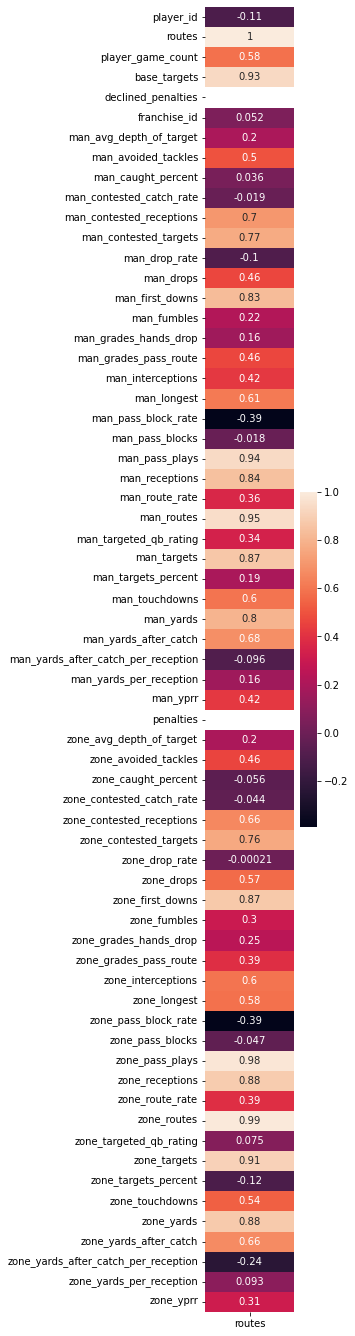

In [27]:
plt.figure(figsize=(2, 24))
sb.heatmap(receiving_scheme.corr()[['routes']], annot=True)

In [28]:
receiving_scheme['route_ratio'] = receiving_scheme['man_routes'] / receiving_scheme['zone_routes']

<AxesSubplot:xlabel='route_ratio', ylabel='position'>

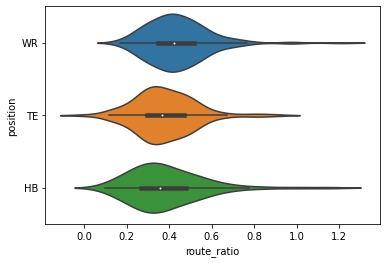

In [30]:
sb.violinplot(data=receiving_scheme, x='route_ratio', y='position')

<AxesSubplot:xlabel='man_routes', ylabel='man_contested_targets'>

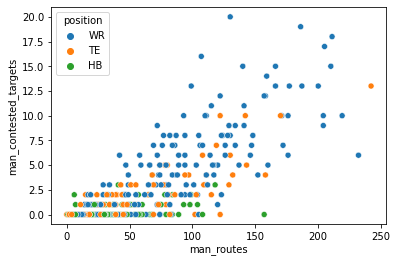

In [33]:
sb.scatterplot(data=receiving_scheme, x='man_routes', y='man_contested_targets', hue='position')

In [15]:
receiving_depth.describe()

,player_id,player_game_count,base_targets,behind_los_avg_depth_of_target,behind_los_avoided_tackles,behind_los_caught_percent,behind_los_contested_catch_rate,behind_los_contested_receptions,behind_los_contested_targets,behind_los_drop_rate,behind_los_drops,behind_los_first_downs,behind_los_fumbles,behind_los_grades_hands_drop,behind_los_grades_pass_route,behind_los_interceptions,behind_los_longest,behind_los_pass_block_rate,behind_los_pass_blocks,behind_los_pass_plays,behind_los_receptions,behind_los_route_rate,behind_los_routes,behind_los_targeted_qb_rating,behind_los_targets,behind_los_targets_percent,behind_los_touchdowns,behind_los_yards,behind_los_yards_after_catch,behind_los_yards_after_catch_per_reception,behind_los_yards_per_reception,behind_los_yprr,center_behind_los_avg_depth_of_target,center_behind_los_avoided_tackles,center_behind_los_caught_percent,center_behind_los_contested_catch_rate,center_behind_los_contested_receptions,center_behind_los_contested_targets,center_behind_los_drop_rate,center_behind_los_drops,center_behind_los_first_downs,center_behind_los_fumbles,center_behind_los_grades_hands_drop,center_behind_los_grades_pass_route,center_behind_los_interceptions,center_behind_los_longest,center_behind_los_pass_block_rate,center_behind_los_pass_blocks,center_behind_los_pass_plays,center_behind_los_receptions,center_behind_los_route_rate,center_behind_los_routes,center_behind_los_targeted_qb_rating,center_behind_los_targets,center_behind_los_targets_percent,center_behind_los_touchdowns,center_behind_los_yards,center_behind_los_yards_after_catch,center_behind_los_yards_after_catch_per_reception,center_behind_los_yards_per_reception,center_behind_los_yprr,center_deep_avg_depth_of_target,center_deep_avoided_tackles,center_deep_caught_percent,center_deep_contested_catch_rate,center_deep_contested_receptions,center_deep_contested_targets,center_deep_drop_rate,center_deep_drops,center_deep_first_downs,center_deep_fumbles,center_deep_grades_hands_drop,center_deep_grades_pass_route,center_deep_interceptions,center_deep_longest,center_deep_pass_block_rate,center_deep_pass_blocks,center_deep_pass_plays,center_deep_receptions,center_deep_route_rate,center_deep_routes,center_deep_targeted_qb_rating,center_deep_targets,center_deep_targets_percent,center_deep_touchdowns,center_deep_yards,center_deep_yards_after_catch,center_deep_yards_after_catch_per_reception,center_deep_yards_per_reception,center_deep_yprr,center_medium_avg_depth_of_target,center_medium_avoided_tackles,center_medium_caught_percent,center_medium_contested_catch_rate,center_medium_contested_receptions,center_medium_contested_targets,center_medium_drop_rate,center_medium_drops,center_medium_first_downs,center_medium_fumbles,center_medium_grades_hands_drop,center_medium_grades_pass_route,center_medium_interceptions,center_medium_longest,center_medium_pass_block_rate,center_medium_pass_blocks,center_medium_pass_plays,center_medium_receptions,center_medium_route_rate,center_medium_routes,center_medium_targeted_qb_rating,center_medium_targets,center_medium_targets_percent,center_medium_touchdowns,center_medium_yards,center_medium_yards_after_catch,center_medium_yards_after_catch_per_reception,center_medium_yards_per_reception,center_medium_yprr,center_short_avg_depth_of_target,center_short_avoided_tackles,center_short_caught_percent,center_short_contested_catch_rate,center_short_contested_receptions,center_short_contested_targets,center_short_drop_rate,center_short_drops,center_short_first_downs,center_short_fumbles,center_short_grades_hands_drop,center_short_grades_pass_route,center_short_interceptions,center_short_longest,center_short_pass_block_rate,center_short_pass_blocks,center_short_pass_plays,center_short_receptions,center_short_route_rate,center_short_routes,center_short_targeted_qb_rating,center_short_targets,center_short_targets_percent,center_short_touchdowns,center_short_yards,center_short_yards_after_catch,center_short_yards_after_catch_per_recepti

<AxesSubplot:xlabel='team_name', ylabel='routes'>

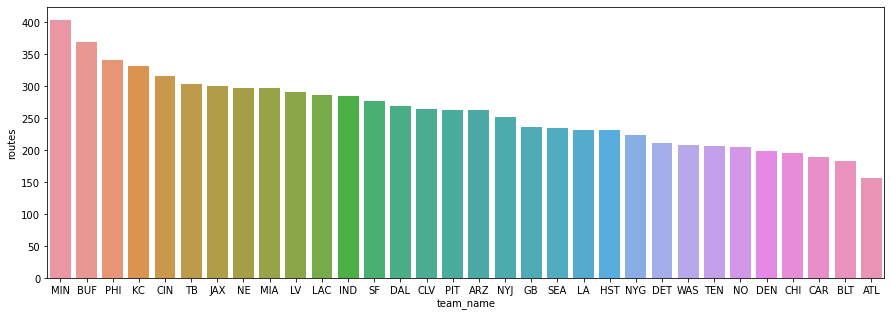

In [43]:
plt.figure(figsize=(15, 5))
sb.barplot(data=receiving_summary.groupby(by='team_name', as_index=False).mean().sort_values(by='routes', ascending=False),
           x='team_name', y='routes')

In [41]:
receiving_summary.groupby(by='team_name', as_index=False).max()

,team_name,player,player_id,position,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,declined_penalties,drop_rate,drops,first_downs,franchise_id,fumbles,grades_hands_drop,grades_hands_fumble,grades_offense,grades_pass_block,grades_pass_route,inline_rate,inline_snaps,interceptions,longest,pass_block_rate,pass_blocks,pass_plays,penalties,receptions,route_rate,routes,slot_rate,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr,perc_catches_contested,yac_to_total_ratio
0,ARZ,Zach Ertz,77761,WR,16,14.6,17,100.0,100.0,11,21,1,50.0,6,35,1,2,90.5,88.4,72.9,81.2,73.5,78.9,170,7,77,35.2,84,523,5,67,94.5,492,82.8,303,107.1,103,4,87.0,338,717,386,8.5,14.1,1.98,66.666667,1.603774
1,ATL,Tyler Allgeier,86519,WR,17,20.5,8,100.0,53.8,14,26,1,7.1,2,47,2,3,88.0,90.8,86.9,80.3,85.3,76.3,170,3,75,43.7,111,439,5,72,98.1,419,70.1,235,134.9,114,4,87.4,344,866,231,10.8,20.6,2.56,22.222222,2.666667
2,BLT,Tylan Wallace,83955,WR,18,17.9,8,100.0,100.0,10,19,1,22.7,5,51,3,2,81.1,89.5,82.7,81.0,79.4,67.8,141,4,62,27.1,49,491,5,78,95.7,466,74.3,318,133.5,119,5,92.2,365,920,284,18.0,19.8,2.04,25.000000,2.750000
3,BUF,Stefon Diggs,84140,WR,18,16.8,15,90.9,100.0,12,26,2,11.8,9,78,4,1,78.0,81.8,89.1,73.4,89.0,37.5,193,6,98,17.5,93,705,5,119,94.8,668,80.3,335,135.6,166,11,89.4,630,1578,440,7.1,17.5,2.40,14.285714,0.959459
4,CAR,Tommy Tremble,84271,WR,17,17.4,15,88.9,100.0,13,23,1,9.5,3,44,5,2,78.0,85.0,85.0,81.0,86.5,84.0,209,5,67,28.5,56,540,5,63,96.9,510,78.7,266,113.0,109,7,90.7,386,888,335,12.4,23.0,2.89,25.000000,1.227723
5,CHI,Velus Jones Jr.,60995,WR,17,19.2,10,87.2,100.0,9,19,1,33.3,3,27,6,2,82.2,90.0,72.5,80.5,68.9,83.6,221,5,56,34.5,59,511,5,50,95.9,428,60.6,275,155.8,76,7,79.7,206,544,293,9.4,16.6,1.58,42.857143,1.492063
6,CIN,Tyler Boyd,84270,WR,19,14.8,18,90.5,100.0,19,33,1,50.0,6,69,7,2,90.1,91.3,83.9,77.5,85.2,88.5,273,5,60,26.2,66,692,4,107,94.7,655,86.2,586,143.8,155,11,85.0,567,1266,530,12.0,19.0,2.71,66.666667,1.171429
7,CLV,Pharaoh Brown,97989,WR,17,17.7,12,100.0,100.0,15,29,1,33.3,6,61,8,1,77.5,89.0,90.3,76.8,83.6,67.8,251,3,55,20.4,59,616,8,78,93.9,573,72.2,236,118.8,126,9,75.0,452,1160,341,9.7,14.9,2.06,25.000000,1.116667
8,DAL,Tony Pollard,61637,WR,19,15.7,16,100.0,100.0,14,30,1,13.0,7,75,9,1,84.5,91.2,90.2,81.0,87.0,74.6,252,5,68,35.3,62,678,5,121,96.3,646,88.9,425,133.3,167,10,92.0,473,1544,555,8.5,12.8,2.39,50.000000,1.000000
9,DEN,Montrell Washington,84068,WR,17,24.9,5,87.1,100.0,14,33,1,23.8,6,42,10,1,87.3,90.5,82.5,58.6,77.9,92.6,150,4,67,37.0,60,576,5,68,95.6,537,65.5,259,135.4,106,6,88.5,510,987,418,21.5,37.5,2.18,21.875000,7.000000
